In [74]:
import imaplib
import os
import email
import matplotlib.pyplot as plt
import pandas as pd
# import db_manager

In [75]:
from bs4 import BeautifulSoup

In [76]:
df = pd.read_csv('data.csv')

In [77]:
df.head()

,Unnamed: 0,email_id,subject,content,cluster
0,0,1764d7d6cf405a4a,"Hi Asfina, 50-90% discounts on Binoculars, Hig...",DQoNCg0KDQoNCjxodG1sPg0KPGhlYWQ-DQo8bWV0YSBodH...,0
1,1,1764c9755fb56cf6,Quickstart was granted access to your Google A...,UXVpY2tzdGFydCB3YXMgZ3JhbnRlZCBhY2Nlc3MgdG8geW...,0
2,2,1764a836a842398f,"Hi Asfina, 🍳🔪 For your kitchen: 90% off trendi...",DQoNCg0KDQoNCjxodG1sPg0KPGhlYWQ-DQo8bWV0YSBodH...,0
3,3,1764872b30de4209,"Hi Asfina, Laptop clearance? 💻 Get a laptop co...",DQoNCg0KDQoNCjxodG1sPg0KPGhlYWQ-DQo8bWV0YSBodH...,0
4,4,176451a1985a5fd6,"Hi Asfina, We&#39;re giving away 100 winter ha...",DQoNCg0KDQoNCjxodG1sPg0KPGhlYWQ-DQo8bWV0YSBodH...,0


In [78]:
df.shape

(1206, 5)

In [79]:
import base64


def decode(text):
    if type(text) == float:
        print(text)
        return text
    text = base64.urlsafe_b64decode(text).decode('utf-8')
    return text

In [80]:
df['content'] = df['content'].apply(lambda content: decode(content))

nan


In [81]:
df.head()

,Unnamed: 0,email_id,subject,content,cluster
0,0,1764d7d6cf405a4a,"Hi Asfina, 50-90% discounts on Binoculars, Hig...",\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,0
1,1,1764c9755fb56cf6,Quickstart was granted access to your Google A...,Quickstart was granted access to your Google A...,0
2,2,1764a836a842398f,"Hi Asfina, 🍳🔪 For your kitchen: 90% off trendi...",\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,0
3,3,1764872b30de4209,"Hi Asfina, Laptop clearance? 💻 Get a laptop co...",\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,0
4,4,176451a1985a5fd6,"Hi Asfina, We&#39;re giving away 100 winter ha...",\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,0


In [90]:
df[df['content'].isna()]

,Unnamed: 0,email_id,subject,content,cluster
972,972,15ee337bd4cb0803,NaN,NaN,0


In [93]:
df = df.dropna()

In [94]:
df[df['content'].isna()]

,Unnamed: 0,email_id,subject,content,cluster


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [96]:
#ltk.download()

In [97]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/hb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
def clean_text(text):
    text = BeautifulSoup(str(text), "lxml").get_text()
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    tokens = [word.lower() for word in tokens]
    text = [word for word in tokens if word not in stopword]
    text = [word for word in text if len(word) > 1]
    return text


In [99]:
df['content_clean'] = df['content'].apply(lambda x: clean_text(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
df[['content','content_clean']].head()

,content,content_clean
0,\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,"[5090, discounts, binoculars, high, power, fla..."
1,Quickstart was granted access to your Google A...,"[quickstart, granted, access, google, account,..."
2,\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,"[kitchen, 90, trending, cutters, kitchen, rack..."
3,\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,"[laptop, clearance, get, laptop, computer, 64,..."
4,\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<meta ...,"[giving, away, 100, winter, hats, right, outlo..."


In [101]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [106]:
data_matrix=vectorizer.fit_transform(df['content'])
print("\n Feature names Identified :\n")
# print(vectorizer.get_feature_names())


 Feature names Identified :



In [107]:
data_matrix.shape

(1205, 5186)

In [108]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


2processed
3processed
4processed
5processed
6processed
7processed
8processed
9processed
10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
Sum of squared distances :  [1003.3506279439606, 914.6892504974694, 881.0399680528452, 864.5155778643006, 853.1213253364434, 843.2092121163778, 830.1719607984181, 821.8244239081879, 814.4067074008204, 801.0721144033317, 790.86198573816, 783.1512126898334, 780.8122218583648, 780.1558152714621, 776.6653224691586, 762.9022793619829, 759.7115737969209, 758.2759121406385, 752.5058590658859, 745.5897740833658, 742.5631213586593, 738.4776356922707, 738.0663831283908, 734.4380998934267, 728.3719866172842, 728.7953954437991, 725.3442953418039, 714.5761170

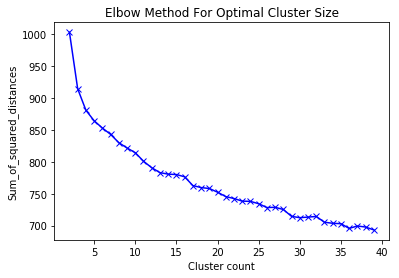

In [109]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(2,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [110]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=15).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_

In [111]:
df['cluster'] = clusters

In [112]:
df[df['cluster'] == 1]

,Unnamed: 0,email_id,subject,content,cluster,content_clean
1184,1184,15066259d8a9f25c,Laura in the Kitchen: &quot;Sausage &amp; Mush...,Laura in the Kitchen: &quot;Sausage &amp; Mush...,1,"[laura, kitchen, sausage, mushroom, pasta, rec..."
1185,1185,1503e15d58f90b37,Laura in the Kitchen: &quot;Pumpkin Pie Ice Cr...,Laura in the Kitchen: &quot;Pumpkin Pie Ice Cr...,1,"[laura, kitchen, pumpkin, pie, ice, cream, mac..."
1186,1186,15014d9f01f62d72,Laura in the Kitchen: &quot;Apple Pie Coffee C...,Laura in the Kitchen: &quot;Apple Pie Coffee C...,1,"[laura, kitchen, apple, pie, coffee, cake, rec..."
1187,1187,14ff34488822c69e,Laura in the Kitchen: &quot;French Toast Stick...,Laura in the Kitchen: &quot;French Toast Stick...,1,"[laura, kitchen, french, toast, sticks, recipe..."
1188,1188,14fcceafb51f2918,Laura in the Kitchen: &quot;Almond Croissants ...,Laura in the Kitchen: &quot;Almond Croissants ...,1,"[laura, kitchen, almond, croissants, recipe, l..."
1189,1189,14faabc043f75e2e,Laura in the Kitchen: &quot;Chocolate Chip Zuc...,Laura in the Kitchen: &quot;Chocolate Chip Zuc...,1,"[laura, kitchen, chocolate, chip, zucchini, br..."
1190,1190,14f85c5a2739dd99,Laura in the Kitchen: &quot;Nutella Cookie Tri...,Laura in the Kitchen: &quot;Nutella Cookie Tri...,1,"[laura, kitchen, nutella, cookie, trifle, dess..."
1191,1191,14f546213c05f65e,Laura in the Kitchen: &quot;Ferrero Rocher Cup...,Laura in the Kitchen: &quot;Ferrero Rocher Cup...,1,"[laura, kitchen, ferrero, rocher, cupcake, rec..."
1192,1192,14f1c2481569b3c1,Laura in the Kitchen: &quot;S&#39;mores Dip - ...,Laura in the Kitchen: &quot;S&#39;mores Dip - ...,1,"[laura, kitchen, smores, dip, laura, vitale, l..."
1193,1193,14effca57a3f24bb,Laura in the Kitchen: &quot;Zucchini Orzotto R...,Laura in the Kitchen: &quot;Zucchini Orzotto R...,1,"[laura, kitchen, zucchini, orzotto, recipe, la..."


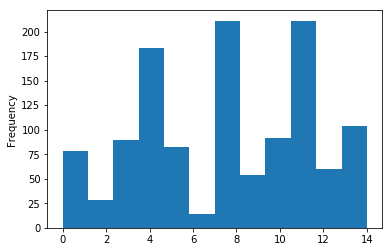

In [113]:
df['cluster'].plot(kind='hist', bins=12)


Group :  0 
-------------------


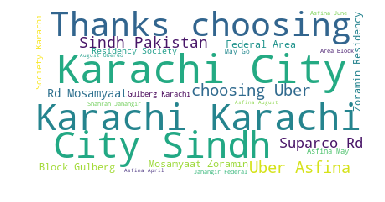


Group :  1 
-------------------


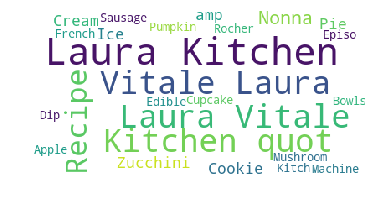


Group :  2 
-------------------


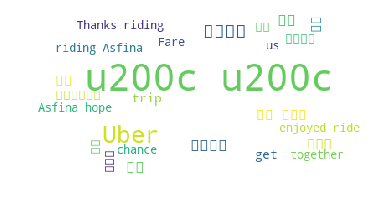


Group :  3 
-------------------


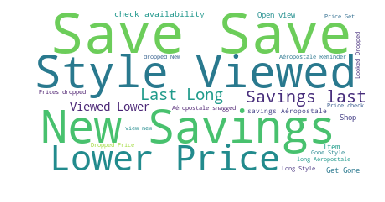


Group :  4 
-------------------


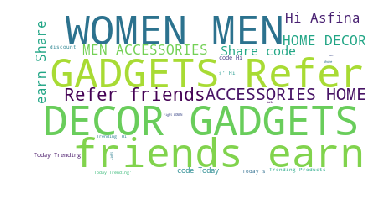


Group :  5 
-------------------


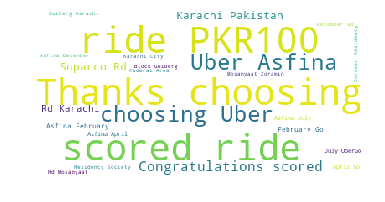


Group :  6 
-------------------


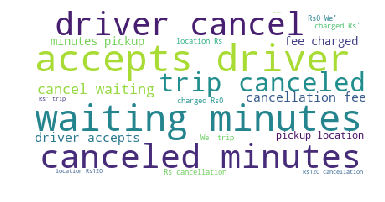


Group :  7 
-------------------


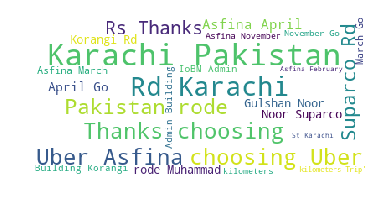


Group :  8 
-------------------


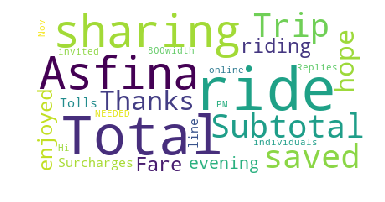


Group :  9 
-------------------


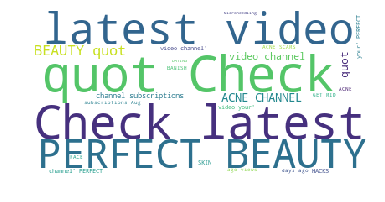


Group :  10 
-------------------


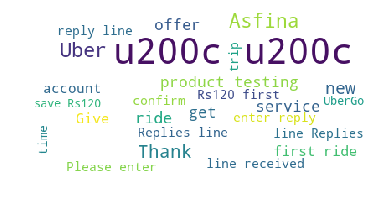


Group :  11 
-------------------


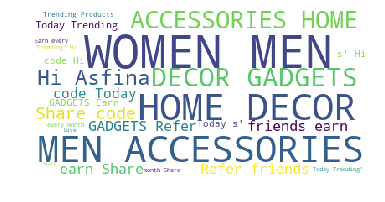


Group :  12 
-------------------


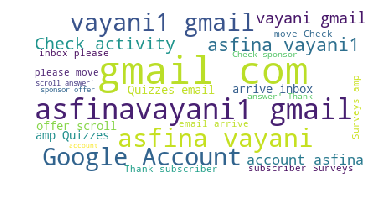


Group :  13 
-------------------


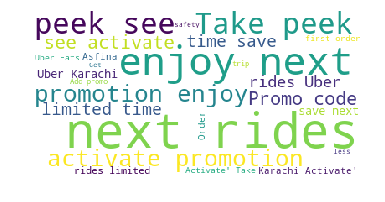


Group :  14 
-------------------


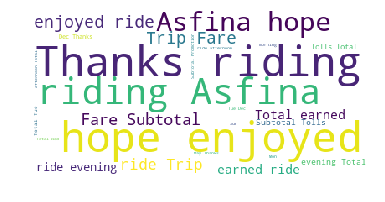

In [114]:
#Print cluster label and Courses under each cluster
from wordcloud import WordCloud
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(str(df[df['cluster'] == group]['subject'].values))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [115]:
custom_data = ["Please book my ride to karachi"]

custom_matrix=vectorizer.transform(custom_data)


In [116]:
custom_matrix.shape

(1, 5186)

In [117]:
a = kmeans.predict(custom_matrix)

In [118]:
a

array([10], dtype=int32)

Save the vectorizers and model

In [119]:
import pickle

In [120]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf.pickle", "wb"))

Now lets compare the eucledean distance of two sentences to see simillarity between them